In [19]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from category_encoders import BinaryEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
#from prettytable import PrettyTable
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')
master = pd.read_excel('master.xlsx')
test = pd.read_excel('test.xlsx')

In [20]:
master.drop(labels=['test_id', 'Ts_Name','Ts_TCD_Releases', 'Ts_Executing_OpCos','Cy_Terminal_SW_Version','Ts_TCD_Releases','date',
                     'Ts_Description(draft)','fail_count','pass_count','Cy_Executing_OpCo',
                     'pass_ratio','Rn_Tester_Name','Terminal'],axis=1,inplace=True)
test.drop(labels=['test_id', 'Ts_Name','Ts_TCD_Releases', 'Ts_Executing_OpCos','Cy_Terminal_SW_Version','Ts_TCD_Releases','date',
                     'Ts_Description(draft)','fail_count','pass_count','Cy_Executing_OpCo',
                     'pass_ratio','Rn_Tester_Name','Terminal'],axis=1,inplace=True)

In [21]:
master.loc[len(master)] = ['missing',0,0,0,0,0,0,0,'missing','2 - Serious','missing',0,'No Run',0,0,0,0,0,0,0,0,
               0,'missing','missing','MR0']


In [22]:
master['defect_from_RN'].fillna(0,inplace=True)
test['defect_from_RN'].fillna(0,inplace=True)

master['Cy_Terminal_Name'].fillna('missing',inplace=True)
master['Cy_Terminal_Release'].fillna('missing',inplace=True)
master['Scope_CTC'].fillna(0,inplace=True)
master['Ts_Suggested_Severity'].fillna('missing',inplace=True)
master['Rn_Status'].fillna('No Run',inplace=True)
master['fail_ratio'].fillna(0.053,inplace=True)
master['soft_ver_count'].fillna(0,inplace=True)
master['Scope_CTC'].replace({'X':1}, inplace=True)
master['Ts_Suggested_Severity'].replace({'4 - Minor':1, '3 - Major':2,'2 - Serious':3,'1b - Critical':4,'1a - Fatal':5,'missing':0}, inplace=True)
master['Rn_Status'].replace({'No Run':0, 'Passed':1, 'Design Limitation':2,'Blocked':3,'Failed':4}, inplace=True)
master['Defect_ID'].fillna(0,inplace=True)
master['Status'].fillna('No Defect',inplace=True)
master['Severity'].fillna('NA',inplace=True)
master['total_defect_count'].fillna(0,inplace=True)
master['open_defect_count'].fillna(0,inplace=True)

test['Cy_Terminal_Name'].fillna('missing',inplace=True)
test['Cy_Terminal_Release'].fillna('missing',inplace=True)
test['Scope_CTC'].fillna(0,inplace=True)
test['Ts_Suggested_Severity'].fillna('missing',inplace=True)
test['Rn_Status'].fillna('No Run',inplace=True)
test['fail_ratio'].fillna(0.053,inplace=True)
test['soft_ver_count'].fillna(0,inplace=True)
test['Scope_CTC'].replace({'X':1, 0:0}, inplace=True)
test['Ts_Suggested_Severity'].replace({'4 - Minor':1, '3 - Major':2,'2 - Serious':3,'1b - Critical':4,'1a - Fatal':5,'missing':0}, inplace=True)
test['Rn_Status'].replace({'No Run':0, 'Passed':1, 'Design Limitation':2,'Blocked':3,'Failed':4}, inplace=True)
test['Defect_ID'].fillna(0,inplace=True)
test['Status'].fillna('No Defect',inplace=True)
test['Severity'].fillna('NA',inplace=True)
test['total_defect_count'].fillna(0,inplace=True)
test['open_defect_count'].fillna(0,inplace=True)

In [23]:
#  scope handling
#master['Scope_CTC'].fillna('N',inplace=True)
master['Scope_CZ'].fillna(0,inplace=True)
master['Scope_DE'].fillna(0,inplace=True)
master['Scope_HU'].fillna(0,inplace=True)
master['Scope_IE'].fillna(0,inplace=True)
master['Scope_NL'].fillna(0,inplace=True)
master['Scope_UK'].fillna(0,inplace=True)

test['Scope_CZ'].fillna(0,inplace=True)
test['Scope_DE'].fillna(0,inplace=True)
test['Scope_HU'].fillna(0,inplace=True)
test['Scope_IE'].fillna(0,inplace=True)
test['Scope_NL'].fillna(0,inplace=True)
test['Scope_UK'].fillna(0,inplace=True)

master['Scope_CZ'].replace({'X':1, 0:0}, inplace=True)
master['Scope_DE'].replace({'X':1, 0:0}, inplace=True)
master['Scope_HU'].replace({'X':1, 0:0}, inplace=True)
master['Scope_IE'].replace({'X':1, 0:0}, inplace=True)
master['Scope_NL'].replace({'X':1, 0:0}, inplace=True)
master['Scope_UK'].replace({'X':1, 0:0}, inplace=True)

test['Scope_CZ'].replace({'X':1, 0:0}, inplace=True)
test['Scope_DE'].replace({'X':1, 0:0}, inplace=True)
test['Scope_HU'].replace({'X':1, 0:0}, inplace=True)
test['Scope_IE'].replace({'X':1, 0:0}, inplace=True)
test['Scope_NL'].replace({'X':1, 0:0}, inplace=True)
test['Scope_UK'].replace({'X':1, 0:0}, inplace=True)

In [24]:
master['Severity'].replace({'NA':0,'4 - Minor':1, '3 - Major':2,'2 - Serious':3,
                                        '1b - Critical':4,'1a - Fatal':5}, inplace=True)
master['Status'].replace({'No Defect':0, 'Closed':1, 'Design Limitation':2,'Duplicate':3,'Rejected':3,'Suspended':3,
                                        'Retest':4,'Reopen':5,'Open':5}, inplace=True)
test['Severity'].replace({'NA':0,'4 - Minor':1, '3 - Major':2,'2 - Serious':3,
                                        '1b - Critical':4,'1a - Fatal':5}, inplace=True)
test['Status'].replace({'No Defect':0, 'Closed':1, 'Design Limitation':2,'Duplicate':3,'Rejected':3,'Suspended':3,
                                        'Retest':4,'Reopen':5,'Open':5}, inplace=True)

In [25]:
# Traning Data
le = LabelEncoder()
master['Cy_Terminal_Name'] = le.fit_transform(master['Cy_Terminal_Name'])
test['Cy_Terminal_Name'] = le.transform(test['Cy_Terminal_Name'])
master['input_terminal'] = le.transform(master['input_terminal'])
test['input_terminal'] = le.transform(test['input_terminal'])

master['Cy_Terminal_Release'] = str(master['Cy_Terminal_Release'])
test['Cy_Terminal_Release'] = str(test['Cy_Terminal_Release'])
master['Cy_Terminal_Release'] = master['Cy_Terminal_Release'].apply(lambda x: 'Launch' if x.startswith('Laun') else 'MR0')
test['Cy_Terminal_Release'] = test['Cy_Terminal_Release'].apply(lambda x: 'Launch' if x.startswith('Laun') else 'MR0')
master['Cy_Terminal_Release'] = le.fit_transform(master['Cy_Terminal_Release'])
test['Cy_Terminal_Release'] = le.transform(test['Cy_Terminal_Release'])

master['input_release'] = le.fit_transform(master['input_release'])
test['input_release'] = le.transform(test['input_release'])


master['Ts_Test_Area'] = le.fit_transform(master['Ts_Test_Area'])
test['Ts_Test_Area'] = le.transform(test['Ts_Test_Area'])
master['area_from_RN'] = le.transform(master['area_from_RN'])
test['area_from_RN'] = le.transform(test['area_from_RN'])

master['Ts_Coverage'] = le.fit_transform(master['Ts_Coverage'])
test['Ts_Coverage'] = le.transform(test['Ts_Coverage'])

master['Defect_ID'] = le.fit_transform(master['Defect_ID'])
test['Defect_ID'] = le.transform(test['Defect_ID'])
master['defect_from_RN'] = le.transform(master['defect_from_RN'])
test['defect_from_RN'] = le.transform(test['defect_from_RN'])

In [26]:
master.shape
encoder = BinaryEncoder(cols=['Cy_Terminal_Name', 'Cy_Terminal_Release',
       'Ts_Test_Area', 'Ts_Coverage','input_terminal', 'input_release','defect_from_RN', 'area_from_RN'])  
master  = encoder.fit_transform(master)
master.shape

(22410, 25)

(22410, 47)

In [27]:
test.shape
test  = encoder.transform(test)
test.shape

(22409, 25)

(22409, 47)

In [28]:
master.isnull().any().any()

False

In [29]:
test.isnull().any().any()

False

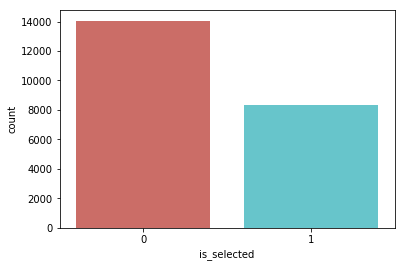

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.countplot(x=master.is_selected,data=master, palette='hls')
plt.show()

In [31]:
master.is_selected.value_counts()

0    14048
1     8362
Name: is_selected, dtype: int64

In [32]:
y_train = master['is_selected']
x_train = master.drop(labels='is_selected',axis=1)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.3, random_state=123)

In [33]:
Y_test = test['is_selected']
X_test = test.drop(labels='is_selected',axis=1)
X_test.shape
x_test.shape

(22409, 46)

(6723, 46)

## PCA

# PCA + Grid serach CV and hyperparameter tunning
### Best parameter:{'max_depth': 15, 'n_estimators': 40}
### PCA : 99% with 6 components

In [34]:
randforest = RandomForestClassifier(n_jobs=-1,random_state=123,class_weight='balanced',max_depth=15,n_estimators=40)
randforest.fit(x_train,y_train)
Y_pred = randforest.predict(X_test)
accuracy_score(Y_test, Y_pred)
f1_score(Y_test, Y_pred) 

RandomForestClassifier(bootstrap=True, class_weight='balanced',
            criterion='gini', max_depth=15, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=40, n_jobs=-1, oob_score=False, random_state=123,
            verbose=0, warm_start=False)

0.7285465661118301

0.7317782971030469

Text(0.5,1,'Confusion Matrix')

Text(0.5,15,'Prediction Label')

Text(33,0.5,'Truth Label')

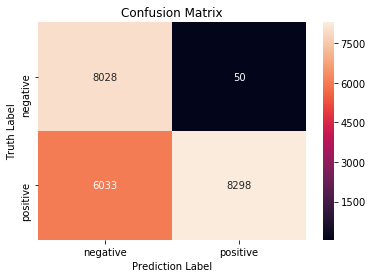

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
cm_log = confusion_matrix(Y_test, Y_pred)
class_label = ["negative", "positive"]
df_cm = pd.DataFrame(cm_log, index = class_label, columns = class_label)
sns.heatmap(df_cm, annot = True, fmt = "d")
plt.title("Confusion Matrix")
plt.xlabel("Prediction Label")
plt.ylabel("Truth Label")
plt.show()

In [37]:
feature_importances = pd.DataFrame(randforest.feature_importances_,
                                   index = X_test.columns,
                                    columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
Ts_Test_Area_4,1.847500e-01
Ts_Test_Area_6,8.706320e-02
soft_ver_count,7.706388e-02
Scope_HU,5.352556e-02
Scope_CZ,4.869174e-02
Scope_IE,4.699882e-02
Ts_Coverage_6,4.107215e-02
Ts_Test_Area_5,3.880158e-02
Ts_Coverage_7,3.767832e-02
Ts_Suggested_Severity,3.728809e-02


# Optimization

In [38]:
def join_rows(df) :
    new_df = pd.DataFrame(index=range(1),columns = df.columns)
    for i in range(df.shape[1]) :                       
        temp = set()
        for j in range(df.shape[0]) :
            if j == 0:
                new_df.iloc[j,i] = df.iloc[j,i]
            else :
                if df.iloc[j,i] != new_df.iloc[0,i] :
                    temp.add(str(df.iloc[j,i]))
        if (len(temp) > 0) :
            temp.add(str(new_df.iloc[0,i]))
            if 'nan' in temp :
                temp.remove('nan')
            new_df.iloc[0,i] = ', '.join(temp)
    return new_df

In [41]:
test = pd.read_excel('test.xlsx')
test['is_predicted'] = Y_pred
#test['Reason to select'] = ''
test.loc[test['is_predicted']==1,'Reason to select'] = 'model prediction'
test.loc[test['is_predicted']==0,'Reason to select'] = 'NA'

In [42]:
frame =  test[test['is_predicted']==1]
frame.shape
# (234, 40)

(8348, 40)

In [43]:
group = frame.groupby(['Ts_Name'])
final = pd.DataFrame()
final = final.append(group.apply(join_rows))

In [44]:
final.to_excel('/Users/natashapandya/Desktop/Final/rule engine model/Final_output/model_predictions.xlsx',index=False)

In [45]:
final.shape

(140, 40)

## --- Model predicted 140 TC

In [46]:
rule = pd.read_excel('FinalTestSuite_nonOptimized_MR.xlsx')  #142  224
rule['is_predicted'] = 1
rule['is_selected'] = 1

In [47]:
test2 = frame.append(rule)
test2.shape

(8702, 43)

In [48]:
group = test2.groupby(['Ts_Name'])
final = pd.DataFrame()
final = final.append(group.apply(join_rows))
final.shape

(362, 43)

In [49]:
final['fail_ratio'].fillna(0,inplace=True)
final['fail_ratio'].replace({'':0},inplace=True)
final['fail_ratio'] = final['fail_ratio'].astype(float)
final['fail_ratio'].dtypes

dtype('float64')

In [50]:
final.to_excel('/Users/natashapandya/Desktop/Final/rule engine model/Final_output/Model_Rule_engine_prediction.xlsx',index=False)

### Total TC model + rule engine prediction = 362

## Criteria One for optimazation ( release note specific )
### 81 TC

In [51]:
final_optimization_1 = final[((final['Rn_Status'] != 'Passed') & (final['Reason to select'].str.contains('Change in version/status of test area')))  |
             (final['Reason to select'].str.contains('linked TC for defect id:'))]
final.shape
final_optimization_1.shape
final_optimization_1.to_excel('/Users/natashapandya/Desktop/Final/rule engine model/Final_output/final_optimization_1.xlsx',index=False)
# (12, 44)

(362, 43)

(81, 43)

## Criteria Two for optimazation 
### 161 TC

In [52]:
final.shape
final_optimization_2 = final[(((final['Cy_Terminal_Name'].str.contains('Hima')) ) & (final['input_terminal'] == 'Hima') 
               & (final['Ts_Suggested_Severity'] == '1a - Fatal') &
                (final['Reason to select'].str.contains('Change in version/status of test area')))  |
                
              (((final['Ts_Suggested_Severity'] == '1a - Fatal') ) & 
               (final['Reason to select'].str.contains('model prediction'))) |
              (final['Reason to select'].str.contains('linked TC for defect id:')) | 
               ( final['Rn_Status'].str.contains('Failed')) ]
final_optimization_2.shape
final_optimization_1.to_excel('/Users/natashapandya/Desktop/Final/rule engine model/Final_output/final_optimization_2.xlsx',index=False)
# (12, 44)

(362, 43)

(161, 43)